#  хөрөнгийн зах зээлийн  үзүүлэлтүүд

## Энэ таамгалахад хүнд үү ?

Дата авсан:   
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5219605/

Дээрх хувьцааны мэдээлэлд үндэслэн урьдчилж тооцоолсон техникийн үзүүлэлтүүдээр дараахь зүйлийг судалж үзэхийг хүсч байна:
1. Өдрийн арилжаа хийхэд ашигтай байж болох үзүүлэлтүүдийг тодорхойл
2. Урьдчилан таамаглахад үнэхээр хэцүү байна уу? Дүрслэлээр дэмжигдсэн.
3. 3 аргыг ашиглан таамаглалын нарийвчлал: SVM ангилагч, PCA-тай SVM ангилагч, мэдрэлийн сүлжээ ангилагч.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_raw = pd.read_csv('S&P500.csv', delimiter=';')
df_raw.shape

(1723, 35)

# CRISP-DM: Бизинесс өгөгдөл ойлгох

In [3]:
display(df_raw)

,Class,Date,Opening Price,Closing Price,Maximum,Minimum,Var. %,Return,MOMENTUM5,EMA12,...,CCI,ATR,UO,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,0,20100420.0,1195.75,1205.50,1205.75,1194.00,0.0084,N,N,N,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,20100421.0,1205.00,1200.50,1209.50,1195.00,-0.0041,-0.004147657,N,1204.730769,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,20100422.0,1198.50,1201.75,1207.00,1186.25,0.0010,0.001041233,N,1204.272189,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,20100423.0,1201.25,1212.25,1213.75,1197.50,0.0087,0.008737258,N,1205.499545,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,20100426.0,1211.25,1208.25,1216.75,1207.50,-0.0033,-0.003299649,N,1205.922692,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Ажиглалт:
1. Зарим мөрүүдэд NaN-ийг бүгдийг нь агуулдаг.
2. Зарим баганад бүх NaN-ийг устгана.
3. Зарим багана нь эхэнд 'N' тэмдэгтэй байна. Эдгээр нь техникийн үзүүлэлтүүд хараахан гараагүй байгаа тул ойлгомжтой болно. Жишээлбэл, MOMENTUM5-ийг 5 хоногийн өмнөх үнэ, одоогийн үнэд үндэслэн тооцдог. Тиймээс 6-ны өдрийг хүртэл тооцоологдохгүй. 'N' бүхий мөрүүдийг шинжилгээнээс хасах болно.

# CRISP-DM: Data бэлтгэл

In [4]:
# null utga
df_raw = df_raw.dropna(how='all', axis=1)

# null utga
df_raw = df_raw.dropna(how='all', axis=0)

#  'N' values
df_raw = df_raw.drop(df_raw[np.sum(df_raw == 'N', axis = 1) != 0].index)

/Users/hoshinorin/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [5]:
np.sum(df_raw.isnull())

Class                   0
Date                    0
Opening Price           0
Closing Price           0
Maximum                 0
Minimum                 0
Var. %                  0
Return                  0
MOMENTUM5               0
EMA12                   0
EMA26                   0
MACD 12-26              0
EMA9 of MACD12-26       0
MACD 12-26-9            0
ROI10                   0
ROI20                   0
ROI30                   0
RSI 10                  0
RSI 14                  0
RSI 30                  0
STOCHRSI10              0
STOCHRSI14              0
STOCHRSI30              0
ADX                     0
Williams%R              0
CCI                     0
ATR                     0
UO                      0
Unnamed: 30          1568
Unnamed: 31          1568
Unnamed: 32          1569
dtype: int64

#### Дээрх 3 алхамыг хийсний дараа тэг биш тоо бүхий 3 багана байна. Тэдний нэр нь бүгд "Нэргүй" учраас хасагдах болно.

In [6]:
to_be_dropped = ['Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32']
df_raw = df_raw.drop(to_be_dropped, axis=1)

In [7]:
# Write a function to implement all data cleaning steps above
def clean_data(df):
    '''
    INPUT:
    df - raw data
    
    OUTPUT:
    df - cleaned data
    '''

    # Remove columns with all null values
    df = df.dropna(how='all', axis=1)
    
    # Remove rows with all null values
    df = df.dropna(how='all', axis=0)

    # Remove all rows with 'N' values
    df = df.drop(df[np.sum(df == 'N', axis = 1) != 0].index)
    
    # Remove 'Unnamed' columns
    to_be_dropped = ['Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32']
    df = df.drop(to_be_dropped, axis=1)
    
    # To ensure all data are numeric
    df = df.apply(pd.to_numeric, errors='raise')
    
    after_processed = df.isnull().sum().sum()
    print('Number of missing values after processing is {}.'.format(after_processed))
            
    return df

df_raw = pd.read_csv('S&P500.csv', delimiter=';')
df_clean = clean_data(df_raw)
print('The shape of cleaned data is {}'.format(df_clean.shape))
df_clean.head()

Number of missing values after processing is 0.
The shape of cleaned data is (1570, 28)


,Class,Date,Opening Price,Closing Price,Maximum,Minimum,Var. %,Return,MOMENTUM5,EMA12,...,RSI 14,RSI 30,STOCHRSI10,STOCHRSI14,STOCHRSI30,ADX,Williams%R,CCI,ATR,UO
29,1,20100601.0,1088.50,1069.50,1096.00,1068.50,-1.75,-0.017455,-1.50,1095.438631,...,50.124796,50.686311,0.456614,0.185332,0.0,60.075827,-76.268116,-80.659478,31.530495,51.559407
30,1,20100602.0,1069.25,1096.75,1098.25,1067.25,2.55,0.025479,23.75,1095.640380,...,49.709238,50.472996,0.583809,0.000000,0.0,60.024364,-56.521739,-54.973958,31.492602,53.150815
31,0,20100603.0,1097.00,1103.50,1105.25,1090.75,0.62,0.006155,42.25,1096.849552,...,49.916178,50.466666,0.724254,0.167157,0.0,60.500695,-45.621181,-21.091355,30.278845,56.758550
32,0,20100604.0,1104.00,1066.00,1107.75,1059.25,-3.40,-0.033983,-35.00,1092.103467,...,50.092403,50.435512,1.000000,0.309503,0.0,60.701730,-73.589165,-68.316641,31.580356,46.907870
33,1,20100607.0,1064.00,1048.00,1070.75,1047.00,-1.69,-0.016886,-40.50,1085.318318,...,50.314280,50.372969,1.000000,0.488725,0.0,60.888404,-89.841986,-107.953913,31.021045,46.893024


### Баганы сонголт

Бид маргааш нь үнэ өсөх эсвэл буурахыг урьдчилан таамаглахад аль үзүүлэлт нь ашигтай болохыг судлахыг хүсч байгаа тул (хэрэв боломжтой бол) дараах багануудыг буулгана.

In [8]:
to_be_dropped = ['Date', 'Opening Price', 'Closing Price', 'Maximum', 'Minimum', 'Return']
df_clean = df_clean.drop(to_be_dropped, axis=1)
print('The shape of cleaned data is {}'.format(df_clean.shape))

The shape of cleaned data is (1570, 22)


### Шалгуур үзүүлэлтүүдийн жагсаалт

Энэ мөрдөн байцаалтанд ашигласан үзүүлэлт бүрийн утгыг доорхи линкээс авна уу.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5219605/

In [9]:
print('The list of indicators')
list(df_clean.columns[1:])

The list of indicators


['Var. %',
 'MOMENTUM5',
 'EMA12',
 'EMA26',
 'MACD 12-26',
 'EMA9 of MACD12-26',
 'MACD 12-26-9',
 'ROI10',
 'ROI20',
 'ROI30',
 'RSI 10',
 'RSI 14',
 'RSI 30',
 'STOCHRSI10',
 'STOCHRSI14',
 'STOCHRSI30',
 'ADX',
 'Williams%R',
 'CCI',
 'ATR',
 'UO']

# CRISP-DM: Өгөгдлийн загварчлал

Маргааш үнийн өсөлтийг таамаглаж чадах уу?
3 хандлагыг ашиглан нарийвчлалыг харьцуулъя
1. SVM Classifier дээр үндэслэсэн хайлт
2. PCA ашиглан SVM ангилагч
3. Мэдрэлийн сүлжээ ангилагч

In [10]:
y = df_clean.Class
X = df_clean.drop('Class', axis=1)

# SVM Classifier

In [11]:
scaler = MinMaxScaler() # default=(0, 1)
scaler.fit(X)
scaled_X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.1, random_state=42)

In [12]:
# build a classifier for support vector machines
clf_svc = SVC()

# Set up the hyperparameter search
# look at setting up your search for C (recommend 0-10 range), 
# kernel, and degree
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
param_dist = {"C": [0.1, 0.5, 1, 3],
              "kernel": ['linear', 'rbf'],
              "gamma": ['auto']
             }

# Run a randomized search over the hyperparameters
svc_search = RandomizedSearchCV(clf_svc, cv=3, param_distributions=param_dist)

# Fit the model on the training data
svc_search.fit(X_train, y_train)

# Make predictions on the test data
svc_preds = svc_search.best_estimator_.predict(X_test)

/Users/hoshinorin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [13]:
def print_metrics(y_true, preds, model_name=None):
    '''
    INPUT:
    y_true - the y values that are actually true in the dataset (numpy array or pandas series)
    preds - the predictions for those values from some model (numpy array or pandas series) 
    
    OUTPUT:
    None - prints the accuracy, precision, recall, and F1 score
    '''
    print('Accuracy score: ', format(accuracy_score(y_true, preds)))
    print('Precision score: ', format(precision_score(y_true, preds)))
    print('Recall score: ', format(recall_score(y_true, preds)))
    print('F1 score: ', format(f1_score(y_true, preds)))

In [14]:
# Make predictions on the training data
train_preds = svc_search.best_estimator_.predict(X_train)
print('====Training Data====')
print_metrics(y_train, train_preds)

====Training Data====
Accuracy score:  0.5640481245576787
Precision score:  0.5684754521963824
Recall score:  0.6094182825484764
F1 score:  0.588235294117647


In [15]:
print('====Testing Data====')
print_metrics(y_test, svc_preds)

====Testing Data====
Accuracy score:  0.5031847133757962
Precision score:  0.5172413793103449
Recall score:  0.5555555555555556
F1 score:  0.5357142857142857


# PCA задрал

#### хэдэн бүрэлдэхүүн хэсэг шаардлагатай вэ?
#### Хамгийн жинтэй үзүүлэлтүүд юу вэ?
#### Мөн үүнээс илүү чухал зүйл бол таамаглалын нарийвчлал хэрхэн байгаа вэ?

In [16]:
# Apply PCA to the data.
pca = PCA()
Xpca = pca.fit_transform(X)
print(Xpca.shape)
pca

(1570, 21)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
Xpca.shape

(1570, 21)

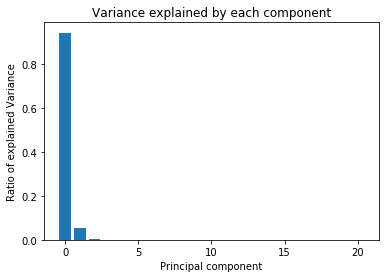

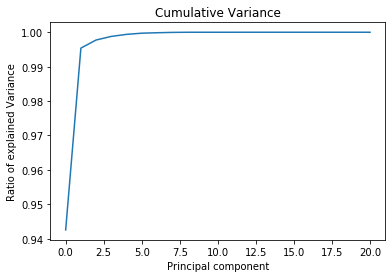

In [19]:
# Investigate the variance accounted for by each principal component.

plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.title("Variance explained by each component")
plt.xlabel("Principal component")
plt.ylabel("Ratio of explained Variance")
plt.show()

plt.plot(range(len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative Variance")
plt.xlabel("Principal component")
plt.ylabel("Ratio of explained Variance")
plt.show()

In [20]:
np.cumsum(pca.explained_variance_ratio_)

array([0.94256736, 0.99539048, 0.99774414, 0.99879143, 0.99938069,
       0.99972609, 0.99985486, 0.99995481, 0.99999614, 0.99999838,
       0.99999915, 0.99999959, 0.99999985, 0.99999993, 0.99999997,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

#### Two components explain more than 99%!!!

# Question 1: Important indicators for Day Trading
#### Let's analyze the most weighted indicators for each component

In [21]:
def pca_weights(pca, no_component, no_features):
    '''
    INPUT:
    pca - the PCA
    no_component - principal component number 
    no_features - number of features
    
    OUTPUT:
    None - prints top 5 features and plot the features with their weights
    '''
    df = pd.DataFrame(pca.components_, columns=X.columns)
    weights = abs(df.iloc[no_component-1]).sort_values(ascending=False)
    features = weights.index[:no_features]
    s = pd.Series(df.iloc[no_component-1][features].values, index=features)
    s.plot(kind='barh',rot=0)
    plt.title("Ranking of the Features")
    plt.xlabel("Weight")
    plt.ylabel("Features")
    print('Top {} features in principal component no {}'.format(no_features, no_component))
    display(s)

Top 5 features in principal component no 1


EMA12   -0.707551
EMA26   -0.706410
CCI      0.018209
ADX     -0.003016
ATR     -0.002624
dtype: float64

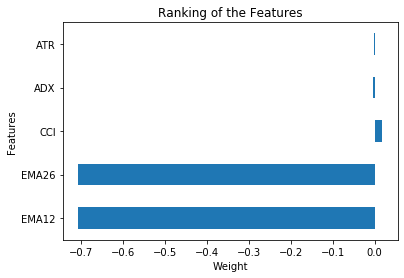

In [22]:
pca_weights(pca, 1, 5)

Top 5 features in principal component no 2


CCI          -0.936850
Williams%R   -0.243844
MOMENTUM5    -0.215871
UO           -0.073389
MACD 12-26   -0.071729
dtype: float64

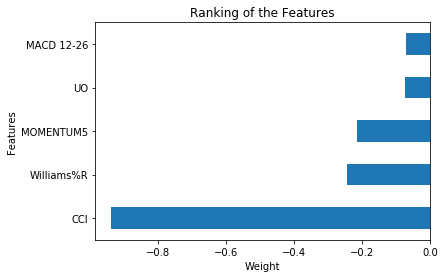

In [23]:
pca_weights(pca, 2, 5)

#### Answer 1: As can be seen from plots above, EMA12, EMA26 and CCI are 3 most weighted indicators from PCA components 1 and 2 which explained more than 99% of original data.

#### What is the accuracy using PCA?
Let's use the two components to train SVM classifier.

In [24]:
newX = Xpca[:,0:2]
X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=0.1, random_state=42)

# Fit the model on the training data
svc_search.fit(X_train, y_train)

# Make predictions on the test data
svc_preds = svc_search.best_estimator_.predict(X_test)

# Make predictions on the training data
train_preds = svc_search.best_estimator_.predict(X_train)

print('====Training Data====')
print_metrics(y_train, train_preds)

print('====Testing Data====')
print_metrics(y_test, svc_preds)

/Users/hoshinorin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


====Training Data====
Accuracy score:  0.5477707006369427
Precision score:  0.5586987270155587
Recall score:  0.5470914127423823
F1 score:  0.5528341497550734
====Testing Data====
Accuracy score:  0.5031847133757962
Precision score:  0.5189873417721519
Recall score:  0.5061728395061729
F1 score:  0.5125


Хоёр бүрэлдэхүүн хэсэг нь 99% -иас илүү ялгаатай байгааг тайлбарлаж байсан ч гэсэн ийм нарийвчлал бага байна!

# Асуулт 2: Урьдчилан таамаглахад үнэхээр хэцүү байна уу?

PCA-ийн хоёр бүрэлдэхүүн хэсгийг төсөөлж үзье.

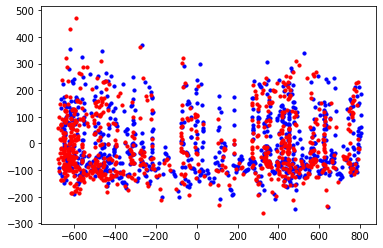

In [25]:
dfnewX = pd.DataFrame(newX)
dfnewX.columns = 'x1', 'x2'
dfnewX['y'] = y.values
idx_1 = np.where(dfnewX.y == 1)
idx_0 = np.where(dfnewX.y == 0)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(dfnewX.iloc[idx_1].x1, dfnewX.iloc[idx_1].x2, s=10, c='b', marker="o")
ax1.scatter(dfnewX.iloc[idx_0].x1, dfnewX.iloc[idx_0].x2, s=10, c='r', marker="o")
plt.show()

Дээрх хуйвалдаанаас харахад хоёр ангийн хооронд тодорхой салалт байхгүй байна!
Тиймээс хоёртын ангиллын алгоритм нь хөрөнгийн зах зээлийн мэдээллийг ангилахад үр дүнтэй биш байж магадгүй юм.

# Neural Network Classifier

In [29]:
pip install tensorflow


     |████████████████████████████████| 120.8MB 347kB/s eta 0:00:01    |██████████████████▋             | 70.1MB 1.8MB/s eta 0:00:29     |███████████████████████████████▍| 118.7MB 1.6MB/s eta 0:00:02
     |████████████████████████████████| 61kB 9.4MB/s  eta 0:00:01
     |████████████████████████████████| 71kB 9.9MB/s  eta 0:00:01
     |████████████████████████████████| 112kB 243kB/s eta 0:00:01
     |████████████████████████████████| 1.3MB 1.6MB/s eta 0:00:01
     |████████████████████████████████| 28.4MB 1.7MB/s eta 0:00:01    |███████▋                        | 6.8MB 1.9MB/s eta 0:00:12
     |████████████████████████████████| 3.9MB 1.9MB/s eta 0:00:01
     |████████████████████████████████| 450kB 872kB/s eta 0:00:01
     |████████████████████████████████| 2.5MB 2.0MB/s eta 0:00:01
     |████████████████████████████████| 81kB 8.5MB/s eta 0:00:01
     |████████████████████████████████| 92kB 8.0MB/s eta 0:00:011
     |████████████████████████████████| 163kB 875kB/s eta 0:00:01
     |████

     |████████████████████████████████| 153kB 1.4MB/s eta 0:00:01
  Created wheel for termcolor: filename=termcolor-1.1.0-cp37-none-any.whl size=4832 sha256=f1a7993ba3f15d3360c433042546fc6d850e15c29d854bee5b4bdb6f08afd801
  Stored in directory: /Users/hoshinorin/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Created wheel for absl-py: filename=absl_py-0.9.0-cp37-none-any.whl size=121932 sha256=fb20b55161d50bc29640b35548e09b66a599bc08192de11bc5b04bb18c0e90fd
  Stored in directory: /Users/hoshinorin/Library/Caches/pip/wheels/8e/28/49/fad4e7f0b9a1227708cbbee4487ac8558a7334849cb81c813d
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=e466358e8295c1dbd8891cad8ad824db6e1584f901126ac8924565167b3174e0
  Stored in directory: /Users/hoshinorin/Library/Caches/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built termcolor absl-py gast
  Found existing installation: scipy 1.3.1
    Uninstal

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

Using TensorFlow backend.


In [31]:
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(1413, 2)
(157, 2)


In [32]:
# TODO: Build the model architecture
model = Sequential()
model.add(Dense(4096, activation='relu', input_dim=2))
model.add(Dropout(0.1))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# TODO: Compile the model using a loss function and an optimizer.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4096)              12288     
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dropout_2 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              4195328   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

In [33]:
# TODO: Run the model. Feel free to experiment with different batch sizes and number of epochs.
model.fit(X_train, y_train,
          batch_size=20,
          epochs=10,
          validation_data=(X_test, y_test), 
          verbose=2)

Train on 1413 samples, validate on 157 samples
Epoch 1/10
 - 17s - loss: 7.3548 - accuracy: 0.4827 - val_loss: 0.8273 - val_accuracy: 0.5159
Epoch 2/10
 - 16s - loss: 0.7774 - accuracy: 0.4982 - val_loss: 0.7094 - val_accuracy: 0.5096
Epoch 3/10
 - 16s - loss: 0.7176 - accuracy: 0.5364 - val_loss: 0.7026 - val_accuracy: 0.4395
Epoch 4/10
 - 20s - loss: 0.7066 - accuracy: 0.5357 - val_loss: 0.7044 - val_accuracy: 0.4140
Epoch 5/10
 - 20s - loss: 0.7076 - accuracy: 0.5287 - val_loss: 0.6985 - val_accuracy: 0.5096
Epoch 6/10
 - 19s - loss: 0.6978 - accuracy: 0.5301 - val_loss: 0.7049 - val_accuracy: 0.5223
Epoch 7/10
 - 19s - loss: 0.6974 - accuracy: 0.5435 - val_loss: 0.7005 - val_accuracy: 0.4968
Epoch 8/10
 - 19s - loss: 0.7037 - accuracy: 0.5159 - val_loss: 0.7221 - val_accuracy: 0.5159
Epoch 9/10
 - 19s - loss: 0.6996 - accuracy: 0.5195 - val_loss: 0.7361 - val_accuracy: 0.4968
Epoch 10/10
 - 20s - loss: 0.6904 - accuracy: 0.5563 - val_loss: 0.7001 - val_accuracy: 0.5223


In [34]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: ", score[1])

Accuracy:  0.522292971611023


# Асуулт 3: Урьдчилан таамаглалын нарийвчлал

Загвар | Сургалтын нарийвчлал | Нарийвчлалыг туршиж үзэх
--- | --- | ---
SVM | 56% | 50%
SVM with PCA | 55% | 50%
Neural Network | 51% | 52% 

# Дүгнэлт

Энэхүү мөрдөн байцаалтанд ашигласан өгөгдлүүд дээр үндэслэн техникийн үзүүлэлтүүд дээр үндэслэн үнийн хөдөлгөөнийг урьдчилан таамаглахад үнэхээр хэцүү байдаг.